# Dataset



For simplicity we use the Wine dataset from sklearn (UCI).

Features:
- alcohol
- malic_acid
- ash
- alcalinity_of_ash
- magnesium
- total_phenols
- flavanoids
- nonflavanoid_phenols
- proanthocyanins
- color_intensity
- hue
- od280od315_of_diluted_wines'
- proline

Labels: Wine classes

In [ ]:
from sklearn.datasets import load_wine
import numpy as np

data = load_wine()
features = data["data"]
labels = data["target"]
features.shape

(178, 13)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
try:
  import ipyvolume as ipv
except:
  !pip install ipyvolume -q
  import ipyvolume as ipv
  !jupyter nbextension enable --py --sys-prefix ipyvolume

def visualize_2d(x, labels):
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=labels, s=100, alpha=0.8,
                    palette="Greens", edgecolor="black")

def visualize_3d(x, labels):
    # Workaround as axis limits are not auto-scaling
    x_norm = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
    fig = ipv.figure(height=400, width=400)
    x, y, z = x_norm[:, 0], x_norm[:, 1], x_norm[:, 2]

    # Colors
    cmap = plt.get_cmap('Greens', 3)
    color = cmap(labels)
    ipv.scatter(x, y, z, size=4, marker="sphere", color=color)
    ipv.show()

# TSNE

In [ ]:
from sklearn.manifold import TSNE

%time tsne_3d = TSNE(n_components=3, perplexity=10, early_exaggeration=12, learning_rate='auto', init='pca', n_jobs=4).fit_transform(features)
visualize_3d(tsne_3d, labels)

CPU times: user 7.57 s, sys: 21.8 ms, total: 7.59 s
Wall time: 9.27 s


Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

CPU times: user 1.25 s, sys: 7.55 ms, total: 1.26 s
Wall time: 668 ms


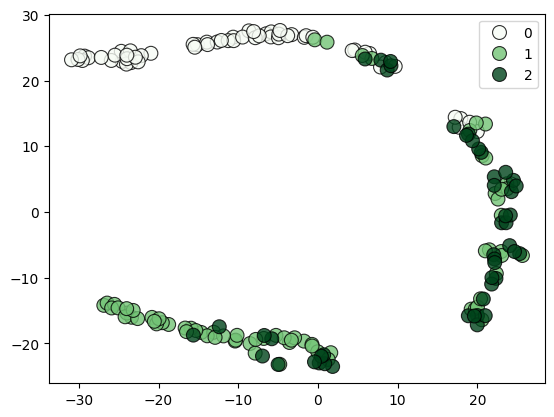

In [ ]:
%time tsne_2d = TSNE(n_components=2, perplexity=10, early_exaggeration=12, learning_rate='auto', init='random', n_jobs=4).fit_transform(features)
visualize_2d(tsne_2d, labels)